In [1]:
#!pip install -U scikit-learn

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
#import pandas.core.common import flatten

In [3]:
#Comparing classifiers
no_of_robot_steps = 100

fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')


len_of_steps = len(fixed_wheel_x[0])
total_len_of_columns = len_of_steps * 3
total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
total_pose_size = int(total_pose_size/total_len_of_columns)

#print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))

omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))

two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]

headings = []
for i in range(0,len(x_headings)):
    headings.append(x_headings[i])
    headings.append(y_headings[i])
    headings.append(theta_headings[i])
#headings = x_headings + y_headings + theta_headings
#headings

fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

#Add class labels
fixed_p.insert(0,'Model type', 'fw')
omni_p.insert(0,'Model type', 'ow')
two_fixed_p.insert(0,'Model type', 'tf')

wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])

wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
wheel_poses = wheel_poses.reset_index(drop=True)


X = wheel_poses.drop(columns='Model type')
y = wheel_poses['Model type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=16)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(2100, 300) (900, 300) (2100,) (900,)


LogisticRegression
Processing___
Processing done

KNeighborsClassifier
Processing___
Processing done

DecisionTreeClassifier
Processing___
Processing done

RandomForestClassifier
Processing___
Processing done

               Classifier  Accuracy(%)  Log Loss  Kappa Score(%)  F1-Score(%)
0      LogisticRegression        46.33      1.10           19.73        45.89
0    KNeighborsClassifier        59.22      6.10           39.36        60.68
0  DecisionTreeClassifier        96.00      1.38           93.99        95.98
0  RandomForestClassifier        98.67      0.06           98.00        98.67


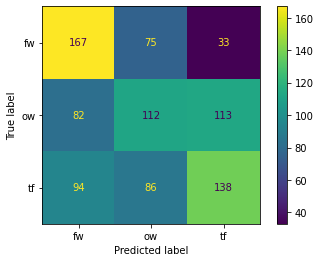

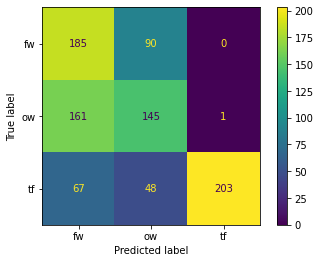

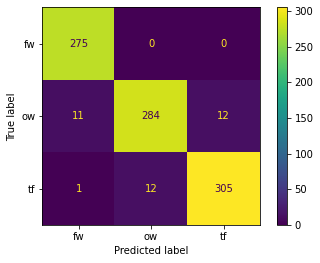

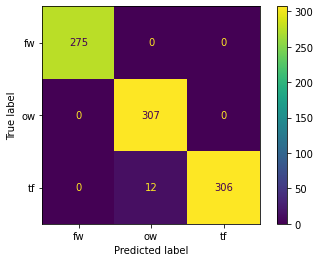

In [4]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LogisticRegression(multi_class ='ovr'),
    KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    #GaussianNB(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy(%)", "Log Loss", "Kappa Score(%)", "F1-Score(%)"]
log = pd.DataFrame(columns=log_cols)



for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    print(name)
    print("Processing___")
    #print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    #print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {}".format(ll))

    train_predictions = clf.predict(X_test)
    kp = cohen_kappa_score(y_test, train_predictions)
    #print("Kappa score: {}".format(kp))

    train_predictions = clf.predict(X_test)
    f1 = f1_score(y_test, train_predictions, average  = 'weighted')
    #print("F1 Score: {}".format(f1))

    #train_predictions = clf.predict(X_test)
    #ps = precision_score(y_test, train_predictions, average  = 'weighted')
    #print("Precision Score: {}".format(ps))

    #train_predictions = clf.predict(X_test)
    #rs = recall_score(y_test, train_predictions, average  = 'weighted')
    #print("Recall Score: {}".format(rs))
    
    confusion_matrix = metrics.plot_confusion_matrix(clf, X_test, y_test)
    #print(name)
    
    log_entry = pd.DataFrame([[name, round(acc*100,2), round(ll,2), round(kp*100,2), round(f1*100,2)]], columns=log_cols)
    log = log.append(log_entry)
    print("Processing done\n")
    #print(confusion_matrix)


log.to_csv(header=True, sep=',')
print("="*30)
print(log)




In [5]:
log.to_csv('classifier analysis',header=True, sep=',')

In [6]:

def get_step_results(no_of_robot_steps):
    fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
    fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
    fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

    omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
    omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
    omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

    two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
    two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
    two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')


    len_of_steps = len(fixed_wheel_x[0])
    total_len_of_columns = len_of_steps * 3
    total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
    total_pose_size = int(total_pose_size/total_len_of_columns)

    print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

    fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
    fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))



    omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
    omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))

    two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
    two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

    x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
    y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
    theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]

    headings = []
    for i in range(0,len(x_headings)):
        headings.append(x_headings[i])
        headings.append(y_headings[i])
        headings.append(theta_headings[i])
    #headings = x_headings + y_headings + theta_headings
    #headings

    fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
    omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
    two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

    #Add class labels
    fixed_p.insert(0,'Model type', 'fw')
    omni_p.insert(0,'Model type', 'ow')
    two_fixed_p.insert(0,'Model type', 'tf')

    wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])

    wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
    wheel_poses = wheel_poses.reset_index(drop=True)


    #wheel_poses['Model type'] = wheel_poses['Model type'].replace('fw',0)
    #wheel_poses['Model type'] = wheel_poses['Model type'].replace('ow',1)
    #wheel_poses['Model type'] = wheel_poses['Model type'].replace('tf',1)

    #wheel_poses['Model type'].value_counts().plot(kind='bar')
    #onehot_encoder = OneHotEncoder(sparse=False)

    X = wheel_poses.drop(columns='Model type')
    y = wheel_poses['Model type']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=16)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    
    classifiers = [
        LogisticRegression(multi_class ='ovr'),
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        
     
    ]

    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss", "Kappa Score", "F1-Score"]
    log = pd.DataFrame(columns=log_cols)



    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        #print("="*30)
        print(name)
        print("Processing___")
        #print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        #print("Accuracy: {:.4%}".format(acc))

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        #print("Log Loss: {}".format(ll))

        train_predictions = clf.predict(X_test)
        kp = cohen_kappa_score(y_test, train_predictions)
        #print("Kappa score: {}".format(kp))

        train_predictions = clf.predict(X_test)
        f1 = f1_score(y_test, train_predictions, average  = 'weighted')
        #print("F1 Score: {}".format(f1))

        #train_predictions = clf.predict(X_test)
        #ps = precision_score(y_test, train_predictions, average  = 'weighted')
        #print("Precision Score: {}".format(ps))

        #train_predictions = clf.predict(X_test)
        #rs = recall_score(y_test, train_predictions, average  = 'weighted')
        #print("Recall Score: {}".format(rs))

        #confusion_matrix = metrics.plot_confusion_matrix(clf, X_test, y_test)
        #print(name)



        log_entry = pd.DataFrame([[name, acc*100, ll, kp*100, f1*100]], columns=log_cols)
        log = log.append(log_entry)
        print("Processing done")
        #print(confusion_matrix)

    print("="*30)
    #print(log)
    
    return log

    



steps = [5, 10, 20, 50, 100]

dic = {}
#steps = [5]

for no_of_robot_steps in steps:
    the_log = get_step_results(no_of_robot_steps)
    dic[no_of_robot_steps] = the_log

Logistics_Table = []
KNN_Table = []
Decision_Tree_Table = None
Random_Forest_Table = None

for k, v in dic.items():
    print("="*30)
    print("For step: ", k, "the results are: \n", v)
    print("="*30)
    

    


Number of robot steps:  5 
Lenght of columns for steps (x,y,theta):  15 
Total number of samples:  1000
(2100, 15) (900, 15) (2100,) (900,)
LogisticRegression
Processing___
Processing done
KNeighborsClassifier
Processing___
Processing done
DecisionTreeClassifier
Processing___
Processing done
RandomForestClassifier
Processing___
Processing done
Number of robot steps:  10 
Lenght of columns for steps (x,y,theta):  30 
Total number of samples:  1000
(2100, 30) (900, 30) (2100,) (900,)
LogisticRegression
Processing___
Processing done
KNeighborsClassifier
Processing___
Processing done
DecisionTreeClassifier
Processing___
Processing done
RandomForestClassifier
Processing___
Processing done
Number of robot steps:  20 
Lenght of columns for steps (x,y,theta):  60 
Total number of samples:  1000
(2100, 60) (900, 60) (2100,) (900,)
LogisticRegression
Processing___
Processing done
KNeighborsClassifier
Processing___
Processing done
DecisionTreeClassifier
Processing___
Processing done
RandomForestC

In [7]:
#Showing relation between number of steps and accuracy and log loss
Logistics_ = [[43.67, 41.67,43.55,44.55,48.00,48.77,43.00], [1.091776,1.091644,1.084037,1.066398,1.044667,1.058423,1.077200]]
KNN_ = [[38.33,40.44, 42.22, 49.88, 60.33,60.78,60.55], [9.385828,9.447498, 8.998371, 7.409023,5.915115,5.573243,5.300916]]
Decision_tree_ = [[68.78,83.88,91.22,95.55,96.11,97.33,98.22], [10.783774,5.564581,3.031737,1.535057,1.343175,0.921034,0.614023]]
Random_forest_ = [[72.44,91.89,94.55,97.67,98.33,99.11,99.44], [0.477294,0.225353,0.162340,0.083599,0.097805,0.076038,0.027591]]